## Ejemplo de uso de Aprendizaje Supervisado

Primeramente importamos las librerias básicas!

In [1]:
import numpy as np
import pandas as pd

Seguidamente, exportamos los datos:

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/fmezacr/DataScienceTEC/master/Clase2/titanic.csv')

Verificamos el tamaño de los datos, donde verificamos que se trate de 891 instancias y 12 columnas de features: 

In [3]:
data.shape

(891, 12)

Visualizamos los primeros datos con .head() 

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Elegimos nuestras columnas de interes:

In [5]:
cols_to_use = ['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']
data = data[cols_to_use]

Verificamos la existencia de NaN:

In [6]:
data.isnull().values.any()

True

Convertimos a "data" en un nuevo set pero esta vez sin "NaN":

In [7]:
data = data.dropna()

Verificamos el tamano del nuevo set, ahora sin NaN:

In [8]:
data.shape

(714, 7)

## Modelo de Aprendizaje Simple

Reemplazamos el valor categórico de género por valores enteros, en este caso binarios:

In [9]:
data['Sex']=data['Sex'].replace({'male': 0, 'female' :1})

Escogemos un conjunto de features básicos y la etiqueta:

In [10]:
features = data[['Sex','Age','Fare']]


In [11]:
labels = data['Survived']

Validamos los cambios llevados a cabo:

In [12]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


In [13]:
features.head()

,Sex,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
features.tail()

,Sex,Age,Fare
885,1,39.0,29.125
886,0,27.0,13.000
887,1,19.0,30.000
889,0,26.0,30.000
890,0,32.0,7.750


Procedemos a partir el conjunto de datos en training y testing:

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13) 

Verificamos los tamaños:

In [17]:
X_train.shape

(535, 3)

In [18]:
X_test.shape

(179, 3)

In [19]:
y_train.shape

(535,)

In [20]:
y_test.shape

(179,)

Ahora contruiremos nuestro primer clasificador, usaremos un DT:

In [21]:
from sklearn.tree import DecisionTreeClassifier

Definimos el modelo con profundidad máxima de 3:

In [22]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)

Llevamos a cabo el entrenamiento:

In [23]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Importamos la métrica, en este caso "accuracy":

In [24]:
from sklearn.metrics import accuracy_score

Llevamos a cabo la predicción con valores de "testing":

In [25]:
y_predict = DecisionTreeModel.predict(X_test)

y ahora evaluamos nuestros resultados con los verdaderos, para ver que tan bueno fue nuestro modelo:

In [26]:
dt1 = accuracy_score(y_test, y_predict)
dt1

0.7932960893854749

De la siguiente forma, visualizamos el DT:

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'])

0

Desplegamos la imagen del árbol con las siguiente instrucción:

    <img src='simple_tree.png' width = 1000px> 

<img src='simple_tree.png' width = 1000px>

## Un modelo más completo, ahora con más features...

In [28]:
features = data[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [29]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [30]:
labels = data['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13) 

In [32]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
y_predict = DecisionTreeModel.predict(X_test)

In [34]:
dt2 = accuracy_score(y_test, y_predict)
dt2

0.8044692737430168

In [35]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree2.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree2.dot', '-o', 'simple_tree2.png'])

0

<img src='simple_tree2.png' width = 1000px> 

## ...y si variamos la profundidad del modelo anterior? 

In [36]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 5)
DecisionTreeModel.fit(X_train,y_train)
y_predict = DecisionTreeModel.predict(X_test)
dt3 = accuracy_score(y_test, y_predict)
dt3

0.7988826815642458

## Pareciera no ser una buena estrategia! Que tal otro algoritmo?

Probamos con RF:

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)

In [39]:
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [40]:
y_predict = RandomForestModel.predict(X_test)

In [42]:
rf = accuracy_score(y_test,y_predict)
rf

0.8100558659217877

In [43]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'])

0

<img src='complete_tree.png' width = 1000px>

In [44]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [45]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [46]:
importances.head(9)

,importance
feature,
Sex,0.390860
Fare,0.203642
Pclass,0.170789
Age,0.167110
SibSp,0.038629
Parch,0.028971


In [47]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

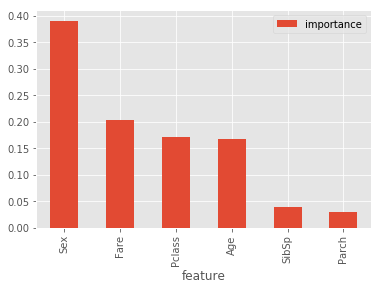

In [48]:
importances.plot.bar()

Siempre es bueno, crear una tabla con los resultados y a partir de ella hacer los respectivos análisis y conclusiones:

Método | Features | Profundidad | Resultado
------------ | ------------- | ------------- | ------------- 
DT | 3 | 3 | 79.32%
DT | 5 | 3 | 80.44% 
DT | 5 | 5 | 79.88%
RF | 5 | NA | 81.00%
